In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: consistent styling
plt.style.use('ggplot')

# For convenience in Jupyter (so plots appear inline)
%matplotlib inline


In [14]:
df = pd.read_csv("../data/raw/athlete_events.csv") 
df.head(10)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [15]:
# Cell 3: Basic Info & Summary

# 1. Load Data (if not already loaded above)
df = pd.read_csv("../data/raw/athlete_events.csv")

# 2. Create a MedalStatus column by filling NaN with "No Medal"
df['MedalStatus'] = df['Medal'].fillna("No Medal")

# 3. Print shape & column names
print("DataFrame Shape (rows, columns):", df.shape, "\n")
print("Column Names:")
print(df.columns, "\n")

# 4. Data info
print("Data Info:")
df.info()

# 5. Basic descriptive statistics (numeric columns)
print("\nBasic Descriptive Statistics (numeric columns):")
display(df.describe())


DataFrame Shape (rows, columns): (271116, 16) 

Column Names:
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'MedalStatus'],
      dtype='object') 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           271116 non-null  int64  
 1   Name         271116 non-null  object 
 2   Sex          271116 non-null  object 
 3   Age          261642 non-null  float64
 4   Height       210945 non-null  float64
 5   Weight       208241 non-null  float64
 6   Team         271116 non-null  object 
 7   NOC          271116 non-null  object 
 8   Games        271116 non-null  object 
 9   Year         271116 non-null  int64  
 10  Season       271116 non-null  object 
 11  City         271116 non-null  object 
 12  Sport        271116 non-null  

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [16]:
# Cell 4: Missing Values & fill "No Medal"

# 1. Check missing values before fillna
missing_counts_before = df.isnull().sum()
print("Missing Values per Column (Before fillna):")
print(missing_counts_before)

# 2. Fill NaN in Medal with "No Medal"
df['Medal'] = df['Medal'].fillna("No Medal")

# 3. Check missing values after fillna
missing_counts_after = df.isnull().sum()
print("\nMissing Values per Column (After fillna for Medal):")
print(missing_counts_after)



Missing Values per Column (Before fillna):
ID                  0
Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
Team                0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal          231333
MedalStatus         0
dtype: int64

Missing Values per Column (After fillna for Medal):
ID                 0
Name               0
Sex                0
Age             9474
Height         60171
Weight         62875
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal              0
MedalStatus        0
dtype: int64


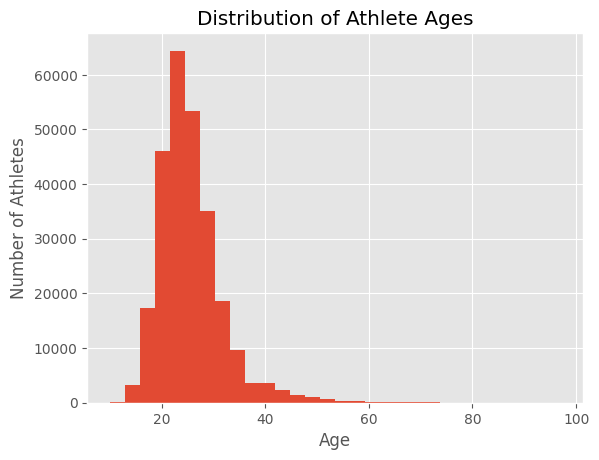

In [17]:
plt.figure()
df['Age'].hist(bins=30)
plt.title("Distribution of Athlete Ages")
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.show()


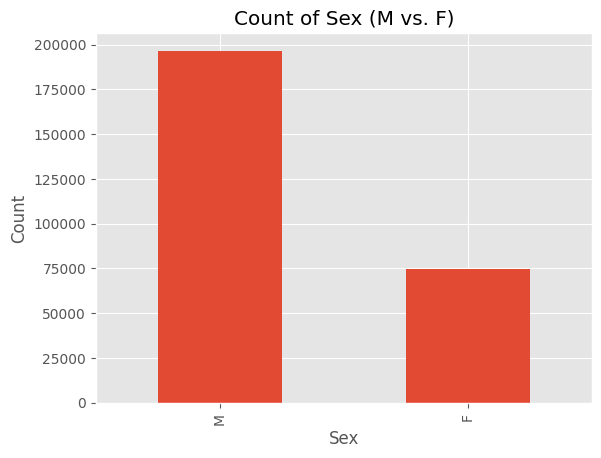

In [18]:
plt.figure()
df['Sex'].value_counts().plot(kind='bar')
plt.title("Count of Sex (M vs. F)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


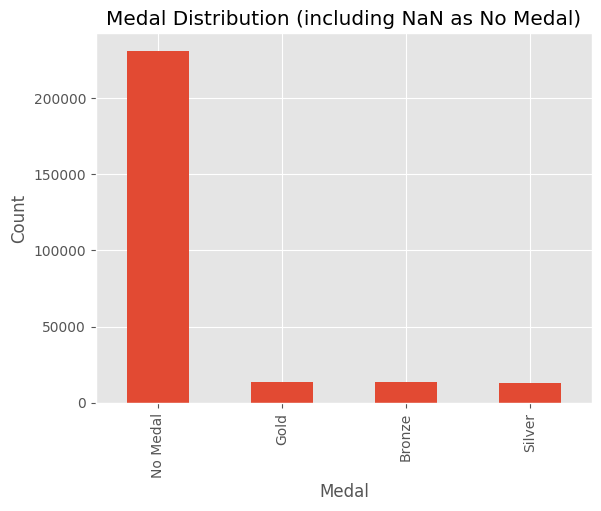

In [19]:
plt.figure()
df['Medal'].value_counts(dropna=False).plot(kind='bar')
plt.title("Medal Distribution (including NaN as No Medal)")
plt.xlabel("Medal")
plt.ylabel("Count")
plt.show()
